# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows = 30000, na_values=['Unknown', 'UNKNOWN', 'NO NAME', 'No name', 'no name', 'unknown'])
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.describe()
# There's nearly 82,000 rows, so went back above and used nrows= in the read_excel function

,Owner Zip Code,Animal Birth,Application Date,License Issued Date,License Expired Date
count,30000.000000,30000,30000,30000,30000
mean,10681.231367,2009-08-16 16:47:02.400000,2015-06-08 08:43:49.046426112,2015-06-07 04:45:59.040000,2016-11-09 21:00:54.720000
min,1003.000000,1984-02-01 00:00:00,2012-09-19 16:01:19.647000,2014-09-12 00:00:00,2016-04-29 00:00:00
25%,10028.000000,2006-11-01 00:00:00,2015-05-15 09:08:40.142000128,2015-05-14 00:00:00,2016-06-16 00:00:00
50%,10465.000000,2010-03-01 00:00:00,2015-06-22 16:08:31.450000128,2015-06-22 00:00:00,2016-07-24 00:00:00
75%,11228.000000,2013-03-01 00:00:00,2015-07-24 09:56:12.337999872,2015-07-23 00:00:00,2016-08-30 00:00:00
max,93036.000000,2015-08-01 00:00:00,2015-08-22 19:20:53.700000,2015-09-19 00:00:00,2021-03-12 00:00:00
std,933.923243,NaN,NaN,NaN,NaN


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row in the dataset is a pet.`Animal name` is the pet's name. `Animal birth` is th pet's birthdate. `Spayed or Neut` is whether the animal has been surgicially rendered infertile or not.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

```
How many guard animals are in this dataset?
What are the most common animal names by zipcode?
How many cockapoos have been licensed in the city and where do they live? I want to see a cockapoo.
```

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29377 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           25223 non-null  object        
 4   Secondary Breed         3971 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

In [5]:
df['Primary Breed'].value_counts(ascending = False)

Primary Breed
Yorkshire Terrier            1882
Shih Tzu                     1760
Chihuahua                    1535
Maltese                      1133
Labrador Retriever           1074
                             ... 
German Longhaired Pointer       1
Tibetan Mastiff                 1
French Spaniel                  1
Kai Ken                         1
Dogo Argentino                  1
Name: count, Length: 250, dtype: int64

<Axes: ylabel='Primary Breed'>

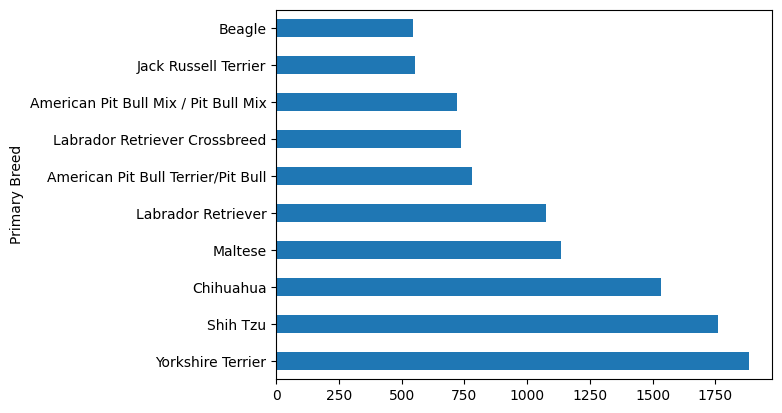

In [6]:
df['Primary Breed'].value_counts(ascending = False).head(10).plot.barh()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

In [7]:
# That means adding Unknown and its variations to the na values and reloading the data. Did that and reloaded, which made it prettier.

## What are the most popular dog names?

In [8]:
df['Animal Name'].value_counts(ascending = False).head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [9]:
df[df['Animal Name'] == 'Adiel'].value_counts()
# Womp womp

Series([], Name: count, dtype: int64)

In [10]:
df[df['Animal Name'].str.contains('Max', na=False)]['Animal Name'].value_counts()

Animal Name
Max                 202
Maximus              27
Maxwell              11
Maxi                  8
Maxie                 7
                   ... 
Max Jr                1
Max P.P.              1
Shadow Max            1
Maximus Aurelius      1
Lucky Max             1
Name: count, Length: 94, dtype: int64

## What percentage of dogs are guard dogs?

In [11]:
df['Guard or Trained'].value_counts(dropna = False, normalize=True)* 100

Guard or Trained
No     66.030000
NaN    33.913333
Yes     0.056667
Name: proportion, dtype: float64

## What are the actual numbers?

In [12]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [13]:
# I think I already did this by using `dropna = False`

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [14]:
df['Guard or Trained'] = df['Guard or Trained'].replace('', 'No')

In [15]:
df['Guard or Trained'].value_counts(dropna = False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

In [16]:
# That didn't work, so let's try this
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')

In [17]:
# Success!
df['Guard or Trained'].value_counts(dropna = False)

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [18]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts(ascending = False)

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [19]:
df['Animal Birth'] = pd.to_datetime(df['Animal Birth'])

In [20]:
df['Animal Birth'].dtypes

dtype('<M8[ns]')

In [21]:
df['Year'] = df['Animal Birth'].dt.year
df['Year'].head()

0    2007
1    2013
2    2014
3    2008
4    2014
Name: Year, dtype: int32

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [22]:
df['Age'] = 2024 - df['Year']
df['Age'].head()

0    17
1    11
2    10
3    16
4    10
Name: Age, dtype: int32

In [23]:
df['Age'].mean()

14.712433333333333

# Joining data together

In [24]:
zip_df = pd.read_csv('zipcodes-neighborhoods.csv')
zip_df.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [25]:
merged = df.merge(zip_df, left_on='Owner Zip Code', right_on='zip')
merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013,Manhattan


In [26]:
merged['borough'].value_counts(dropna = False)

borough
Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: count, dtype: int64

In [27]:
merged[merged['borough'] == 'Brooklyn']['Animal Name'].value_counts(ascending = False).head(5)

Animal Name
Max        46
Bella      45
Charlie    42
Rocky      36
Lucky      32
Name: count, dtype: int64

In [28]:
merged[merged['borough'] == 'Bronx']['Animal Name'].value_counts(ascending = False).head(5)

Animal Name
Bella       22
Max         21
Rocky       20
Lucky       15
Princess    15
Name: count, dtype: int64

In [29]:
merged['neighborhood'].value_counts(dropna = False).head()

neighborhood
Upper West Side        2000
Upper East Side        1851
Northwest Brooklyn     1716
Chelsea and Clinton    1533
South Shore            1375
Name: count, dtype: int64

In [30]:
merged[merged['neighborhood'] == 'Upper East Side']['Animal Name'].value_counts(ascending = False).head(5)

Animal Name
Charlie    19
Bella      12
Lola       10
Lucy       10
Molly       9
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [31]:
merged.groupby('neighborhood')['Primary Breed'].value_counts(ascending = False)

neighborhood  Primary Breed              
Borough Park  Yorkshire Terrier              49
              Maltese                        34
              Shih Tzu                       34
              Chihuahua                      32
              Labrador Retriever             19
                                             ..
West Queens   Soft Coated Wheaten Terrier     1
              Tibetan Spaniel                 1
              Toy Fox Terrier                 1
              Weimaraner                      1
              Wire Fox Terrier                1
Name: count, Length: 3987, dtype: int64

In [32]:
merged.groupby('neighborhood')['neighborhood'].value_counts()

neighborhood
Borough Park                      639
Bronx Park and Fordham            356
Bushwick and Williamsburg         613
Canarsie and Flatlands            531
Central Bronx                     261
Central Brooklyn                  715
Central Harlem                    534
Central Queens                    308
Chelsea and Clinton              1533
East Harlem                       482
East New York and New Lots        291
Flatbush                          457
Gramercy Park and Murray Hill    1002
Greenpoint                        538
Greenwich Village and Soho        740
High Bridge and Morrisania        277
Hunts Point and Mott Haven        255
Inwood and Washington Heights     752
Jamaica                           383
Kingsbridge and Riverdale         395
Lower East Side                  1149
Lower Manhattan                   435
Mid-Island                        486
North Queens                      766
Northeast Bronx                   279
Northeast Queens                  371

In [33]:
# With help from chatGPT, I figured out how to use .apply and lambda x. Could use more practice with that though.
merged.groupby('neighborhood')['Primary Breed'].apply(lambda x: x.mode()[0])

neighborhood
Borough Park                                        Yorkshire Terrier
Bronx Park and Fordham                              Yorkshire Terrier
Bushwick and Williamsburg                           Yorkshire Terrier
Canarsie and Flatlands                                       Shih Tzu
Central Bronx                                       Yorkshire Terrier
Central Brooklyn                                             Shih Tzu
Central Harlem                                              Chihuahua
Central Queens                                      Yorkshire Terrier
Chelsea and Clinton                                         Chihuahua
East Harlem                                         Yorkshire Terrier
East New York and New Lots                          Yorkshire Terrier
Flatbush                                                     Shih Tzu
Gramercy Park and Murray Hill                       Yorkshire Terrier
Greenpoint                                                  Chihuahua
Greenwi

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [34]:
merged.groupby('Primary Breed')['Spayed or Neut'].value_counts(dropna = False, normalize=True).sort_values(ascending = False)

Primary Breed                  Spayed or Neut
American Foxhound              Yes               1.000000
Xoloitzcuintli                 Yes               1.000000
Treeing Tennessee Brindle      No                1.000000
Treeing Walker Coonhound       Yes               1.000000
Tibetan Mastiff                Yes               1.000000
                                                   ...   
Labrador Retriever Crossbreed  No                0.041494
Welsh Corgi, Cardigan          No                0.040000
German Shepherd Crossbreed     No                0.033613
Greyhound                      No                0.017857
Bassett Hound                  No                0.017241
Name: proportion, Length: 427, dtype: float64

In [36]:
breedcount = merged.groupby('Primary Breed')['Primary Breed'].value_counts(dropna = False)
breedcount.head(2)

Primary Breed
Affenpinscher    5
Afghan Hound     5
Name: count, dtype: int64

In [37]:
percentnot = merged[merged['Spayed or Neut'] == 'No'].groupby('Primary Breed')['Spayed or Neut'].value_counts(dropna = False)/breedcount
percentnot.head(2)

Primary Breed  Spayed or Neut
Affenpinscher  No                0.6
Afghan Hound   No                0.2
Name: count, dtype: float64

In [38]:
# There were 12 breeds where all of them were listed as not spayed or neutered
percentnot.sort_values(ascending = False).head(15)

Primary Breed                        Spayed or Neut
Treeing Tennessee Brindle            No                1.000000
Mudi                                 No                1.000000
Mastiff, French (Dogue de Bordeaux)  No                1.000000
Mastiff, Tibetan                     No                1.000000
Borzoi                               No                1.000000
Polish Hound                         No                1.000000
French Spaniel                       No                1.000000
Canaan Dog                           No                1.000000
Dogo Argentino                       No                1.000000
Fila Brasileiro                      No                1.000000
Karelian Bear Dog                    No                1.000000
Kooikerhondje                        No                1.000000
Lagotto Romagnolo                    No                0.666667
Greater Swiss Mountain Dog           No                0.666667
Cardigan Welsh Corgi                 No             

In [39]:
gendercount = merged.groupby('Animal Gender')['Animal Gender'].value_counts(dropna = False)
gendercount.head(3)

Animal Gender
         3
F    13550
M    16020
Name: count, dtype: int64

In [40]:
genderpercent = merged[merged['Spayed or Neut'] == 'No'].groupby('Animal Gender')['Spayed or Neut'].value_counts(dropna = False)/gendercount
genderpercent.head(3)
# Male dogs are less likely to be neutered

Animal Gender  Spayed or Neut
F              No                0.142435
M              No                0.208677
Name: count, dtype: float64

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

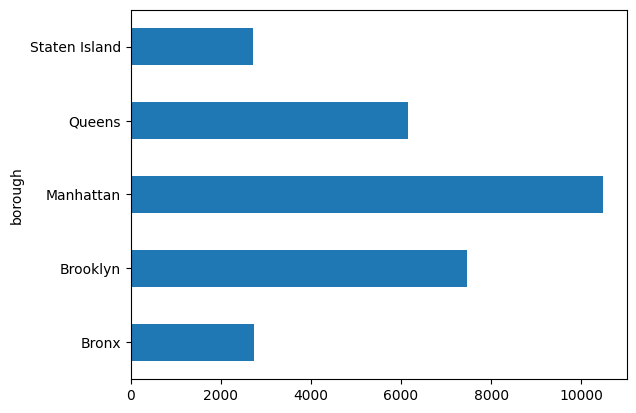

In [41]:
merged.groupby('borough')['borough'].value_counts().plot(kind='barh')

In [42]:
# merged.groupby('borough')['borough'].value_counts()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [43]:
pop_df = pd.read_csv('boro_population.csv')

In [44]:
pop_df.head(5)

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [45]:
pop_merged = pop_df.merge(merged, left_on='borough', right_on='borough')
pop_merged.head()

,borough,population,area_sqmi,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,...,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,zip
0,Manhattan,1644518,23,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,...,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024
1,Manhattan,1644518,23,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,...,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013
2,Manhattan,1644518,23,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,...,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025
3,Manhattan,1644518,23,10013,Ali,M,Basenji,NaN,Black,NaN,...,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013
4,Manhattan,1644518,23,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,...,No,No,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013,11,Greenwich Village and Soho,10013


In [46]:
pop_merged['population'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 29573 entries, 0 to 29572
Series name: population
Non-Null Count  Dtype
--------------  -----
29573 non-null  int64
dtypes: int64(1)
memory usage: 231.2 KB


In [47]:
dogs_boro = pop_merged.groupby('borough')['borough'].value_counts()
dogs_boro.head()

borough
Bronx             2748
Brooklyn          7466
Manhattan        10478
Queens            6154
Staten Island     2727
Name: count, dtype: int64

In [49]:
new_merge = pd.merge(dogs_boro, pop_df, on='borough', how='left')
new_merge.head()

,borough,count,population,area_sqmi
0,Bronx,2748,1455444,42
1,Brooklyn,7466,2636735,71
2,Manhattan,10478,1644518,23
3,Queens,6154,2339150,109
4,Staten Island,2727,474558,59


In [50]:
new_merge['dogs_per_1000'] = (new_merge['count'] / new_merge['population']) * 1000
new_merge.head().sort_values('dogs_per_1000', ascending = False)

,borough,count,population,area_sqmi,dogs_per_1000
2,Manhattan,10478,1644518,23,6.371472
4,Staten Island,2727,474558,59,5.746400
1,Brooklyn,7466,2636735,71,2.831532
3,Queens,6154,2339150,109,2.630870
0,Bronx,2748,1455444,42,1.888084


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [51]:
grouped = merged.groupby('borough')['Primary Breed'].value_counts(ascending = False).reset_index(name='count')
grouped.head()

,borough,Primary Breed,count
0,Bronx,Yorkshire Terrier,250
1,Bronx,Shih Tzu,244
2,Bronx,Chihuahua,208
3,Bronx,American Pit Bull Terrier/Pit Bull,181
4,Bronx,Maltese,139


In [52]:
top_5_breeds = grouped.groupby('borough').head(5).reset_index(drop=True)
top_5_breeds

,borough,Primary Breed,count
0,Bronx,Yorkshire Terrier,250
1,Bronx,Shih Tzu,244
2,Bronx,Chihuahua,208
3,Bronx,American Pit Bull Terrier/Pit Bull,181
4,Bronx,Maltese,139
5,Brooklyn,Yorkshire Terrier,501
6,Brooklyn,Shih Tzu,481
7,Brooklyn,Chihuahua,391
8,Brooklyn,Labrador Retriever,255
9,Brooklyn,Maltese,247


In [54]:
pivot_df = top_5_breeds.pivot(index='borough', columns='Primary Breed', values='count')

<Axes: xlabel='borough'>

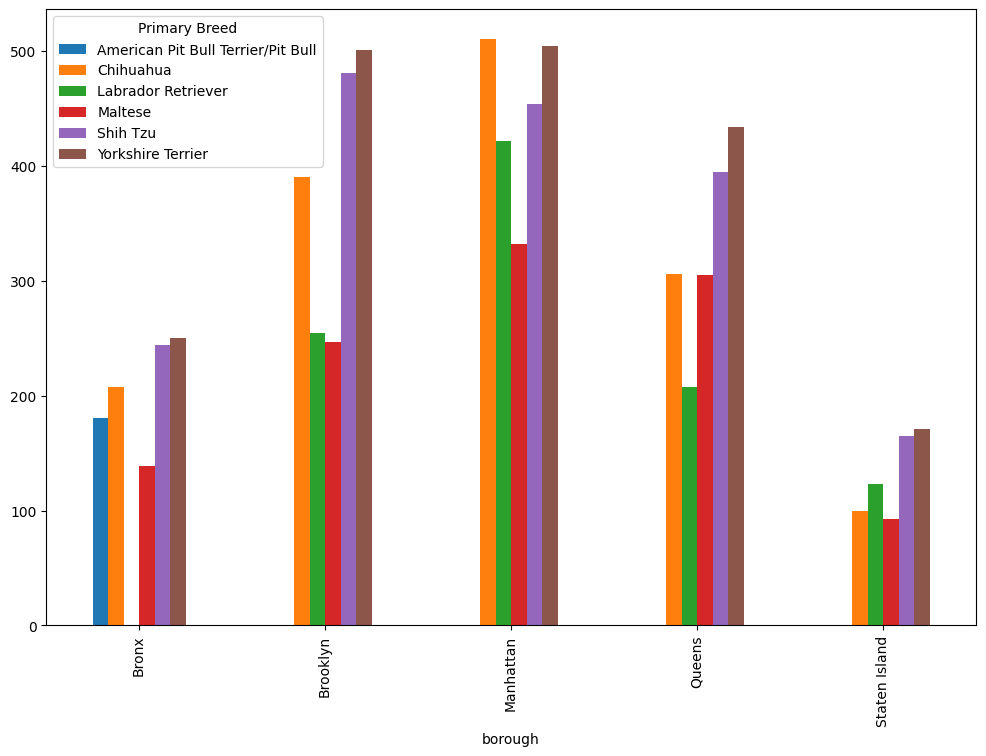

In [55]:
pivot_df.plot(kind='bar', stacked=False, figsize=(12, 8))
# Success! With help from some chatGPT trial and error. The pivot was key.